In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm
% matplotlib inline
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import numpy as np

In [2]:
csvNames = ['Andaman and Nicobar Islands', 'Chhatisgarh', 'Jammu and Kashir', 'Lakshdweep', 'Maharashra', 'Odish', 'Uttarakhand']
mapNames = ['Andaman and Nicobar', 'Chhattisgarh', 'Jammu and Kashmir', 'Lakshadweep', 'Maharashtra', 'Orissa', 'Uttaranchal']

def changeNames(totalsDict):
    for i in range(len(csvNames)):
        totalsDict[mapNames[i]] = totalsDict.pop(csvNames[i])
    return totalsDict

In [1]:
# Based on : https://github.com/nishusharma1608/India-Census-2011-Analysis'
def plotOnMap(totalsDict, title):
    fig, ax = plt.subplots(figsize=(10,10))
    # Create a map with the coordinates determined by the Bounding Box tool
    m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)
    # Draw map boundary and set the color
    m.drawmapboundary(fill_color='#46bcec')
    # Fill continents and lakes
    m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
    # Draw coast lines
    m.drawcoastlines()
    # Load the shape file of India
    m.readshapefile("./IND_adm/IND_adm1","INDIA")

    mappedList = []
    for state_info in m.INDIA_info:
        state = state_info['NAME_1']
        try:
            mappedList.append(totalsDict[state])
        except:
            mappedList.append(0)
    
    # Create a dataframe containing shapes, state names and mapped entity    
    df_poly = pd.DataFrame({'shapes': [Polygon(np.array(shape), True) for shape in m.INDIA],
            'area': [area['NAME_1'] for area in m.INDIA_info],'mappedList' : mappedList})

    # Get all the shapes
    shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
    # Create a colormap
    cmap = plt.get_cmap('YlGnBu')   
    # Create a patch collection. Create patches on the top of the map, not beneath it (zorder=2)
    pc = PatchCollection(shapes, zorder=2)
    norm = Normalize()
    # Set color according to the mapped feature of the state
    pc.set_facecolor(cmap(norm(df_poly['mappedList'].fillna(0).values)))
    ax.add_collection(pc)
    # Create a mapper to map color intensities to values
    mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
    mapper.set_array(mappedList)
    cbar = plt.colorbar(mapper, shrink=0.8)
    cbar.ax.set_title('MW')
    ax.set_title(title, fontsize=15)
    plt.show()

In [4]:
data = pd.read_csv('MOP_installed_capacity_sector_mode_wise.csv')
data = data.replace({'&': 'and'}, regex=True)
data = data.replace({'sh.': 'sh'}, regex=True)
data.head()

,Date,State,Sector,Mode,Installed Capacity
0,20-07-2019,Andaman and Nicobar Islands,STATE SECTOR,Thermal,40.048
1,20-07-2019,Andaman and Nicobar Islands,STATE SECTOR,Nuclear,0.000
2,20-07-2019,Andaman and Nicobar Islands,STATE SECTOR,Hydro,0.000
3,20-07-2019,Andaman and Nicobar Islands,STATE SECTOR,RES,5.250
4,20-07-2019,Andaman and Nicobar Islands,PVT SECTOR,Thermal,0.000


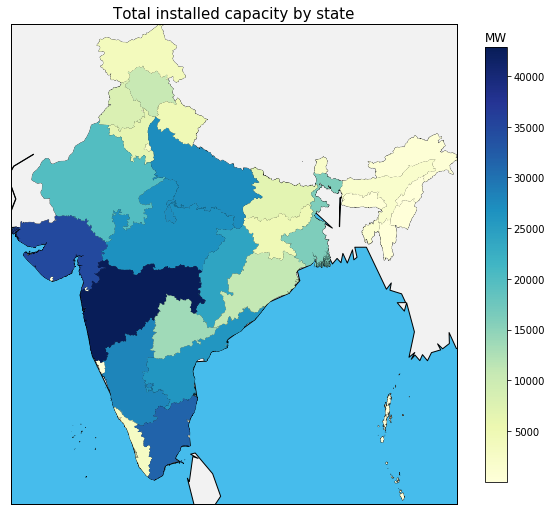

In [5]:
totalByState = data.groupby(by='State').sum()
totalInstalledCapacity = totalByState.to_dict()['Installed Capacity']
totalInstalledCapacity = changeNames(totalInstalledCapacity)
plotOnMap(totalInstalledCapacity, title = "Total installed capacity by state")

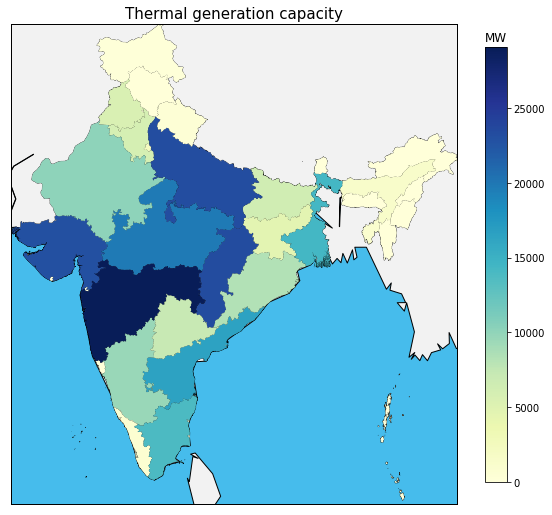

In [6]:
thermalPower = data[data.Mode == 'Thermal']
thermalByState = thermalPower.groupby(by='State').sum()
thermalCapacity = thermalByState.to_dict()['Installed Capacity']
thermalCapacity = changeNames(thermalCapacity)
plotOnMap(thermalCapacity, title = "Thermal generation capacity")

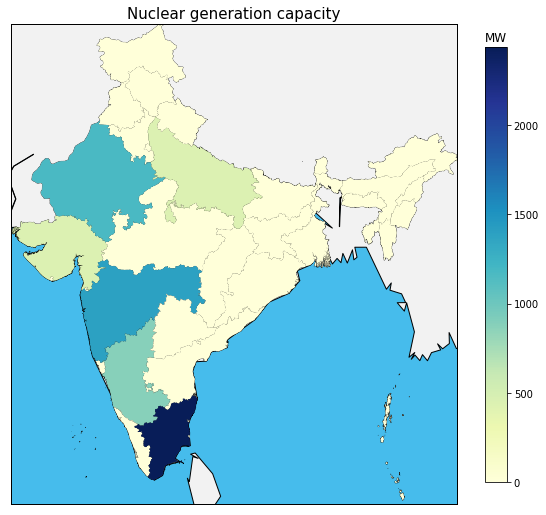

In [7]:
nuclearPower = data[data.Mode == 'Nuclear']
nuclearByState = nuclearPower.groupby(by='State').sum()
nuclearCapacity = nuclearByState.to_dict()['Installed Capacity']
nuclearCapacity = changeNames(nuclearCapacity)
plotOnMap(nuclearCapacity, title = "Nuclear generation capacity")

In [8]:
data.Mode.unique()

array(['Thermal', 'Nuclear', 'Hydro', 'RES'], dtype=object)

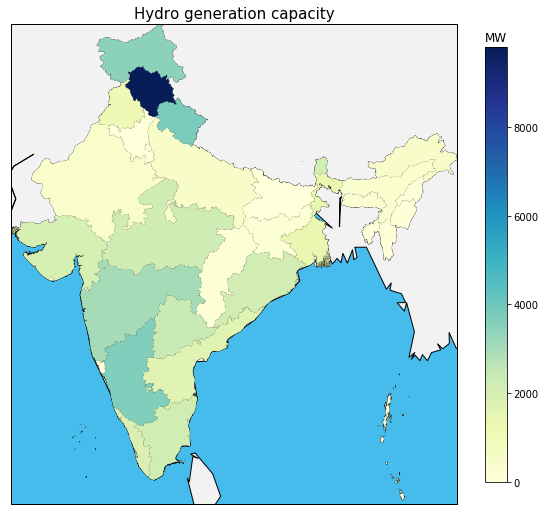

In [9]:
hydroPower = data[data.Mode == 'Hydro']
hydroByState = hydroPower.groupby(by='State').sum()
hydroCapacity = hydroByState.to_dict()['Installed Capacity']
hydroCapacity = changeNames(hydroCapacity)
plotOnMap(hydroCapacity, title = "Hydro generation capacity")

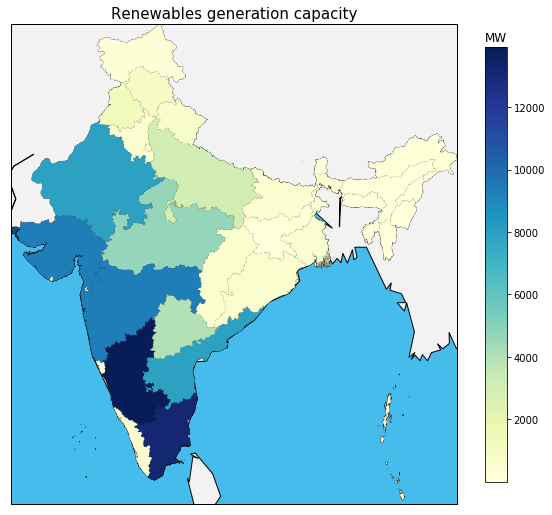

In [10]:
renewablePower = data[data.Mode == 'RES']
greenByState = renewablePower.groupby(by='State').sum()
greenCapacity = greenByState.to_dict()['Installed Capacity']
greenCapacity = changeNames(greenCapacity)
plotOnMap(greenCapacity, title = "Renewables generation capacity")

Datasource from data.gov.in :/Catalogs/Answers Data of Rajya Sabha Questions for Session 237/Target for Solar energy generation by 2022 (From :Ministry of New And Renewable Energy)

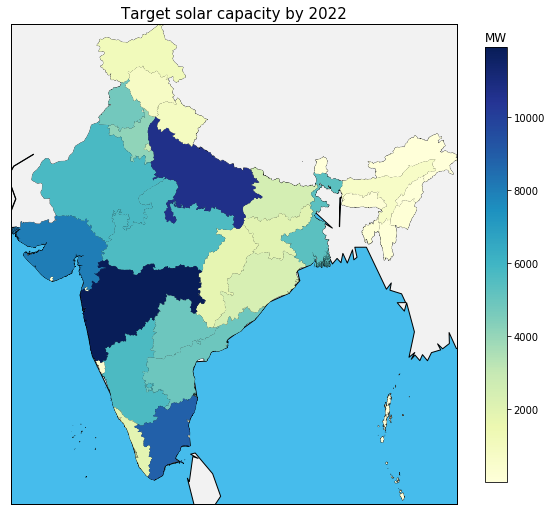

In [11]:
solarTarget = pd.read_csv('solar_target_2022.csv')
solarTarget = solarTarget.groupby(by='State').sum().to_dict()['Capacity']
plotOnMap(solarTarget, title = "Target solar capacity by 2022")